## Progetto Bioinformatica 
--------------------------------------------------------------------------------------------
- Introduzione

Il lavoro collaborativo è volto a sviluppare un simulatore in grado di modellare la dinamica dell'infezione da covid19.

Nello specifico le equazioni differenziali ordinarie permettono di esprimere i passaggi di stato in un orizzonte temporale prefissato (es. da sano a infetto e da infetto a guarito).

Si identifica pertanto un sistema di equazioni che, una volta risolto, permetterà ottenere le variazioni di tutti gli stati e quindi di tracciare la dinamica di interesse da un tempo `t=0` fino a `t=t+x`  dove $x \in \{1,\dots,n\}$



- Svolgimento

dati gli stati : 

- sanicasa  : popolazione costretta all'isolamento dovuto a misure governative di prevenzione
- saniliberi : popolazione libera di muoversi (es. personale medico, media, addetti alla logistica ecc...)
- infetti 
- guariti
- immuni 
- morti
- asintomatici


il sistema identificato è il seguente 

(VEDI IMMAGINE IN ALLEGATO)

--------------------------------------------------------------------------------------------

- Next steps 

0. Verificare la correttezza delle equazioni del sistema 

1. I parametri $k_i$ con $i=1,\dots,8$ iniziali vengono stimati (strumenti statistici come regressione o analisi di serie storiche)

2. Validazione del modello ODE con i parametri stimati. In alternativa è necessaria l'aggiunta di una componente stocastica.


- Implementazione in python 

In [1]:
from scipy.integrate import odeint
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
def deriv(y,t):  
    '''set di equazioni differenziali'''
    Sani_casa,Sani_liberi,Infetti,Asintomatici,Morti,Guariti,Immuni = y 
    dSani_casadt = -alpha * Sani_casa+k8*Guariti
    dSani_liberidt = alpha * Sani_casa - k1 * Sani_liberi*Infetti -   k2 * Sani_liberi*Infetti - k3*Sani_liberi*Asintomatici  - k4*Sani_liberi*Asintomatici
    dInfettidt = k1*Sani_liberi*Infetti+k4*Sani_liberi-k6*Infetti-k7*Infetti
    dAsintomaticidt = k2*Sani_liberi*Infetti+k3*Sani_liberi*Asintomatici-k5*Asintomatici
    dMortidt=k6*Infetti
    dGuaritidt = k5*Asintomatici+k7*Infetti-k8*Guariti-k9*Guariti
    dImmunidt = k9*Guariti
    return dSani_casadt,dSani_liberidt,dInfettidt,dAsintomaticidt,dMortidt,dGuaritidt,dImmunidt   # For odeint

In [3]:
k1,k2,k3,k4,k5,k6,k7,k8,k9 = 0.001,0.002,0.004,0.002,0.003,0.002521,0.0451,0.091,0.011

In [4]:
def grafico(alpha=0.1,orizzonte_temporale_in_gg=10,pop_tot = 3208,
    Sani_casa=1000,
    tot_positivi = 250, 
    Sani_liberi= 2208,
    Infetti=1,
    Guariti=0,
    Asintomatici=145,
    Morti= 9,
    Immuni=200):
    y0 =  [Sani_casa,Sani_liberi,Infetti,Asintomatici,Morti,Guariti,Immuni]
    t = np.linspace(0,orizzonte_temporale_in_gg,orizzonte_temporale_in_gg)
    ret = odeint(deriv, y0, t)
    #ret.T
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111)
    ax.plot(t, ret[:,0], 'b', alpha=0.7 ,lw=2, label='Sani liberi')
    ax.plot(t, ret[:,1], 'r', alpha=0.7 ,lw=2, label='Infetti')
    ax.plot(t, ret[:,2], 'g', alpha=0.7 ,lw=2, label='Guariti')
    ax.plot(t, ret[:,3], 'k', alpha=0.7, lw=2, label='Deceduti')
    ax.plot(t, ret[:,4], 'y', alpha=0.7, lw=2, label='Asintomatici')
    ax.set_xlabel('tempo (in giorni)')
    ax.set_ylabel('Persone (x1000)')
    ax.set_ylim(0,pop_tot*2)
    legend = ax.legend()
    plt.text(1,2800,'alpha='+str(alpha))
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

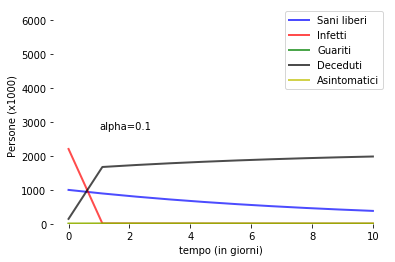

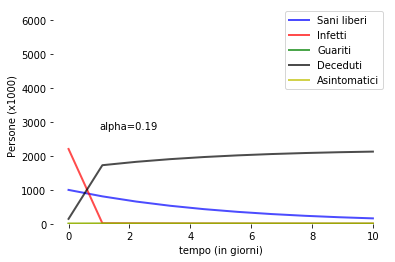

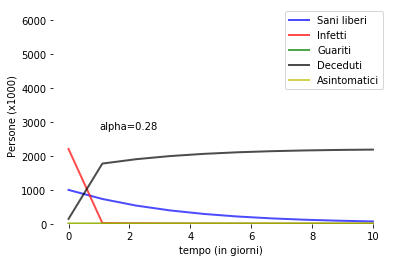

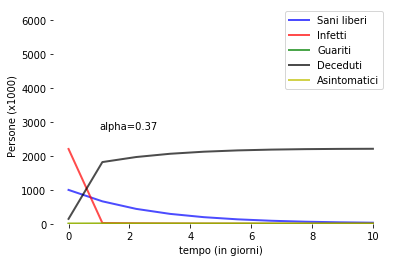

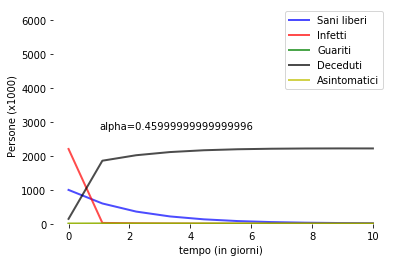

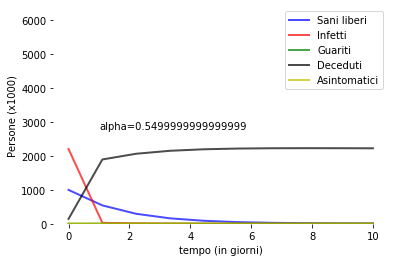

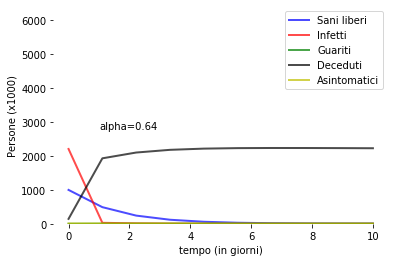

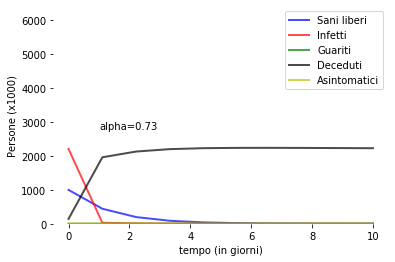

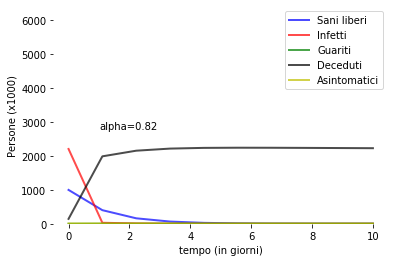

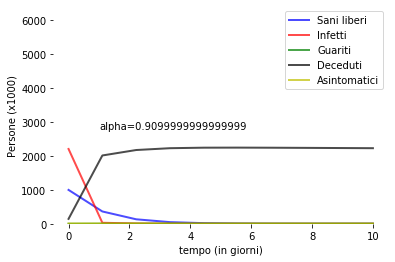

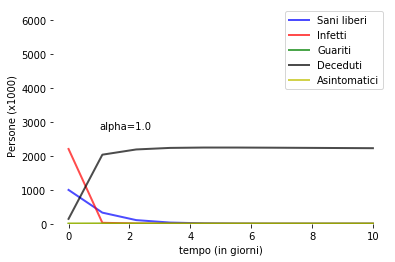

In [6]:
for alpha in np.linspace(0.1,1,11):
    grafico(alpha,10)

#### Principale anomalia
#### NB: i grafici ottenuti devono variare al variare del coefficiente restrittivo $\alpha$

- semplificazione del modello : togliere immuni, asintomatici

- la funzione min(deriv) è la funzione obiettivo (minimizzazione dei minimi quadrati rispetto ai dati osservati (vedi link)

- stabilire il range dei k coefficienti 

- domanda di ricerca : valutazione delle misure preventive e previsione 

- componente stocastica del modello 

https://github.com/pcm-dpc/COVID-19/blob/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv
